In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wrds

from dotenv import dotenv_values
config = dotenv_values(".env")

from mylib.load_from_wrds import query_options_stock

In [8]:
secid = 113993
spec_date = '2021-01-11'

In [9]:
%%time

db = wrds.Connection(wrds_username=config['WRDS_USER'])
df = query_options_stock(db, secid, startdate=spec_date, enddate=spec_date)
db.close()

Loading library list...
Done
CPU times: user 53.7 ms, sys: 12.2 ms, total: 65.9 ms
Wall time: 3.33 s


In [10]:
df.loc[df['cp_flag'] == 'C', 'POP'] = df['V0'] - np.maximum(df['S0'] - df['K'], 0) 
df.loc[df['cp_flag'] == 'P', 'POP'] = df['V0'] - np.maximum(df['K'] - df['S0'], 0)  
df = df.dropna()

In [12]:
maturity_list = [30, 60, 90]

df_select = pd.DataFrame()
for m in maturity_list:
    diff = (df['tau_days'] - m).abs()
    tmp = df[diff == diff.min()]
    df_select = pd.concat([df_select, tmp])
df = df_select

maturity_list = df['tau_days'].drop_duplicates().to_list()
S0 = np.unique(df['S0'])

In [13]:
MEDIUM_SIZE = 18
BIGGER_SIZE = 20
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title

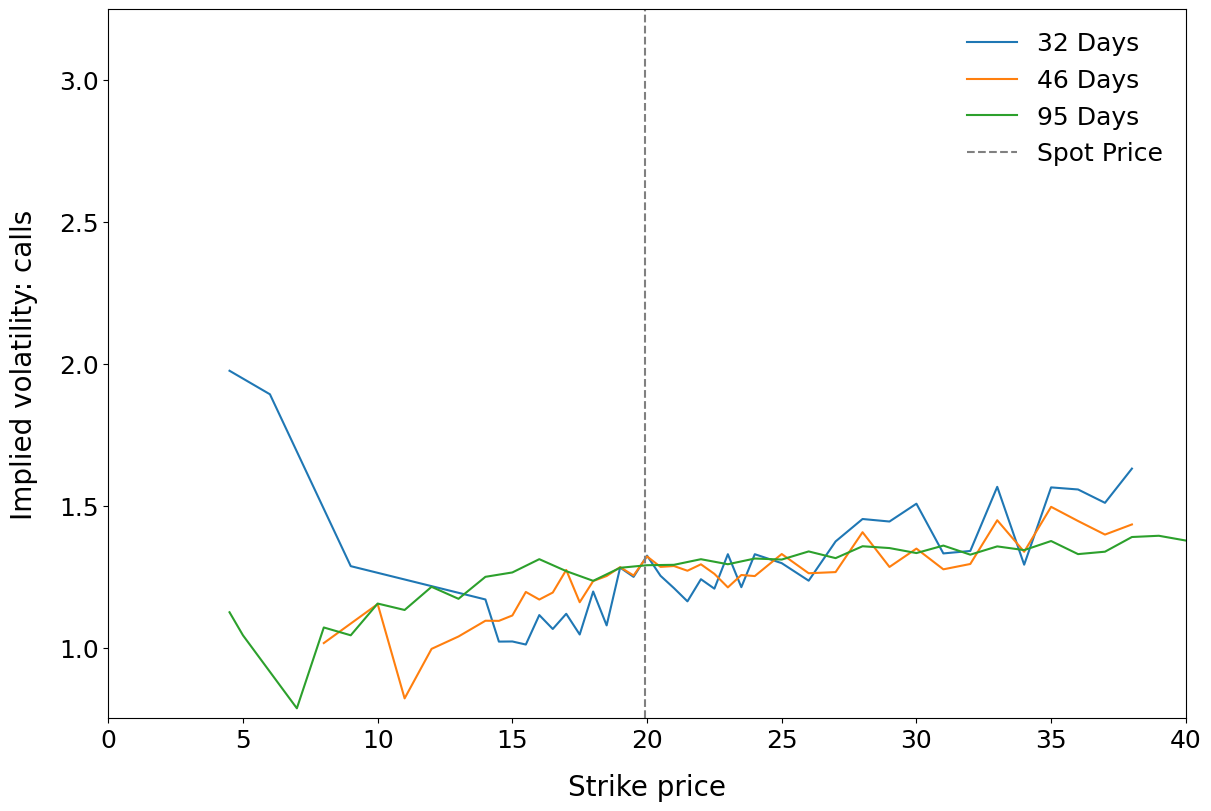

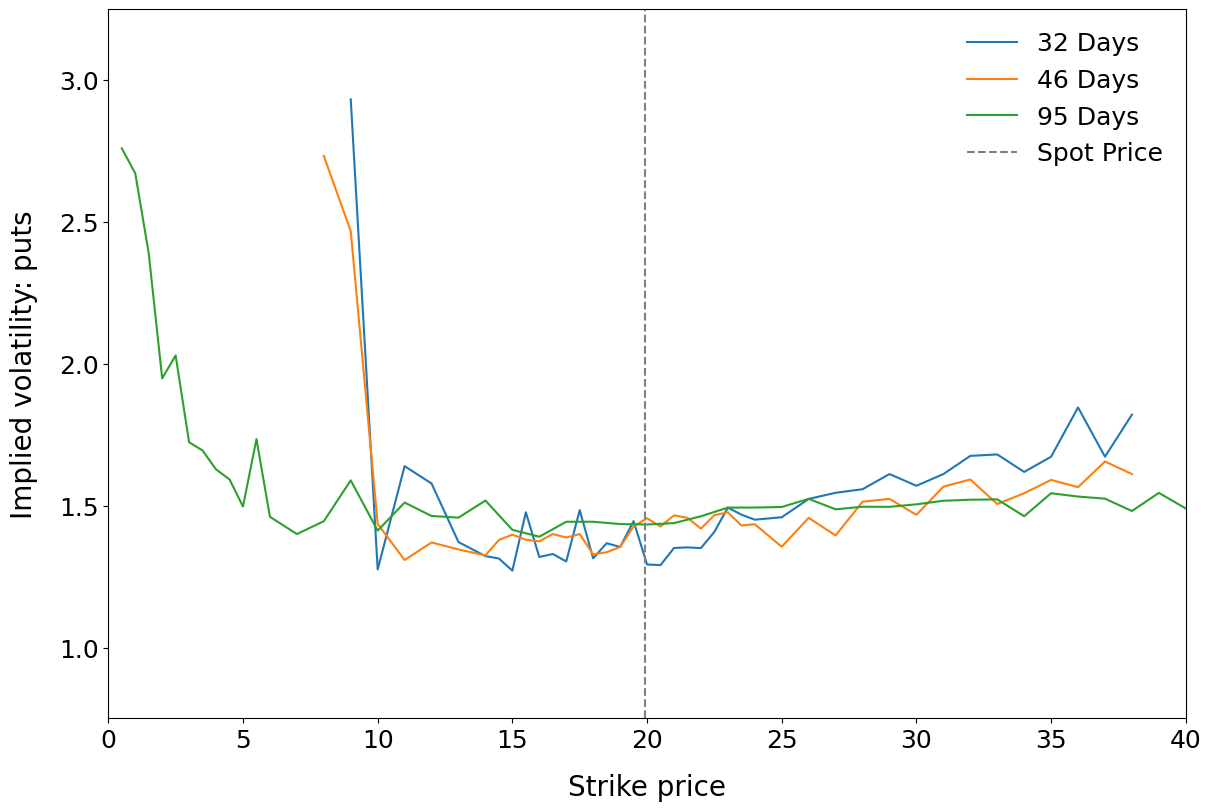

In [21]:
for cp_flag in ['C', 'P']:
    df_cp = df.loc[df['cp_flag'] == cp_flag]  

    fig = plt.figure(figsize=(12, 8), constrained_layout=True)
    ax = fig.add_subplot(111)

    for m in maturity_list:
        rows = df_cp[df_cp['tau_days'] == m]
        plt.plot(rows['K'], rows['impl_volatility'], label=str(m) + ' Days')

    plt.axvline(x=S0, color='grey', linestyle='--', label='Spot Price')
    ax.set_xlabel('Strike price', labelpad=15)
    str_type = 'calls' if cp_flag == 'C' else 'puts'
    ax.set_ylabel('Implied volatility: '+ str_type, labelpad=15)
    ax.set_ylim([0.75, 3.25]) 
    ax.set_xlim([0, 40])

    plt.legend(frameon=False)

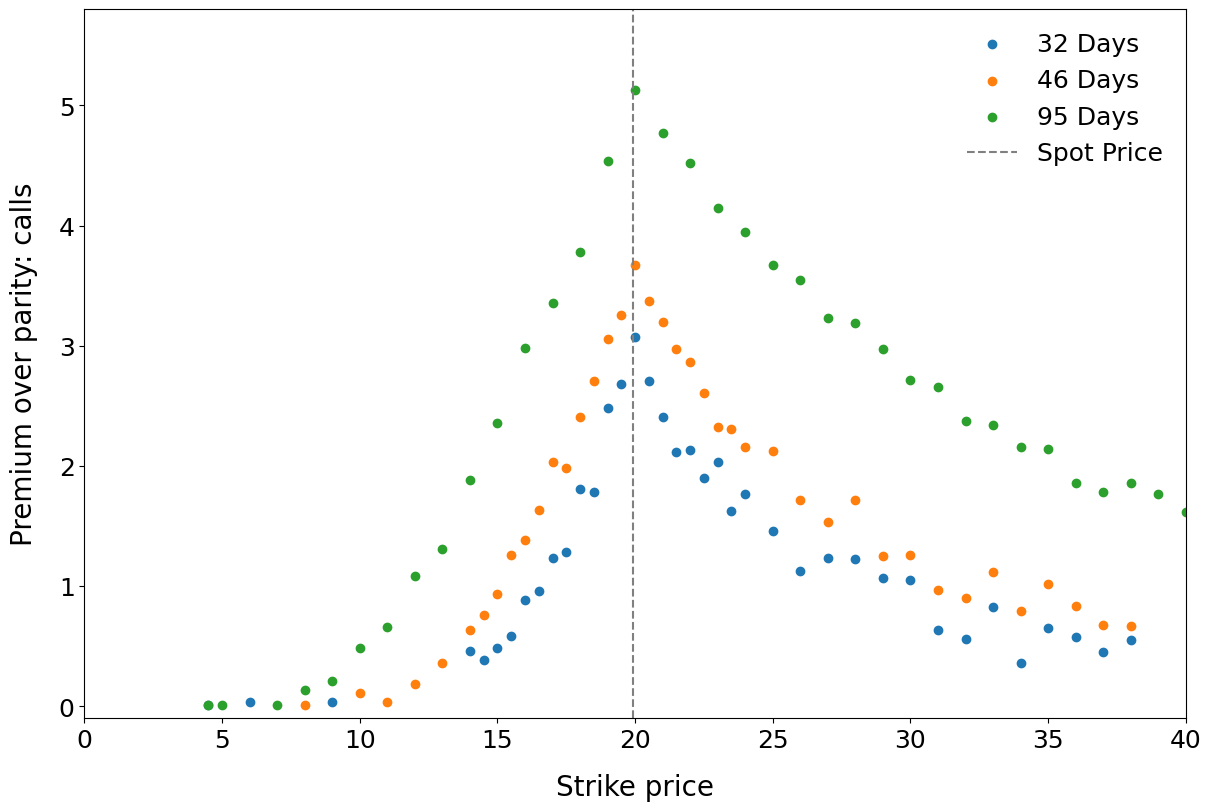

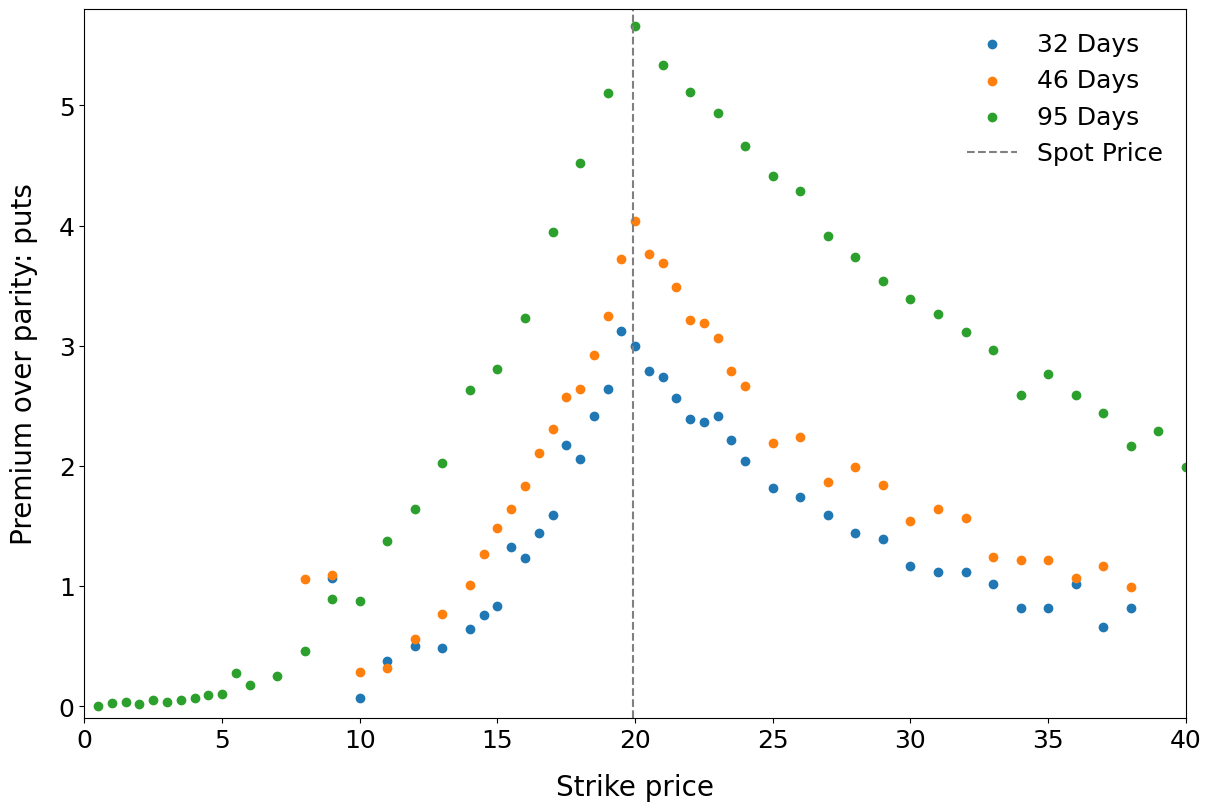

In [35]:
for cp_flag in ['C', 'P']:
    df_cp = df.loc[df['cp_flag'] == cp_flag]  

    fig = plt.figure(figsize=(12, 8), constrained_layout=True)
    ax = fig.add_subplot(111)

    for m in maturity_list:
        rows = df_cp[df_cp['tau_days'] == m]
        plt.scatter(rows['K'], rows['POP'], label=str(m) + ' Days')

    plt.axvline(x=S0, color='grey', linestyle='--', label='Spot Price')
    ax.set_xlabel('Strike price', labelpad=15)
    str_type = 'calls' if cp_flag == 'C' else 'puts'
    ax.set_ylabel('Premium over parity: '+ str_type, labelpad=15)
    ax.set_ylim([-0.1, 5.8]) 
    ax.set_xlim([0, 40])

    plt.legend(frameon=False)